# Importin Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
plt.style.use('ggplot')

import os
import warnings
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize']=(12,8)

# Data Analysis

In [2]:
data=pd.read_csv('EMPLOYEE_TURNOVER.csv')
print(data.shape)
data.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
import pandas_profiling
data.profile_report(title='Data Report')

Text(0, 0.5, 'Turnover')

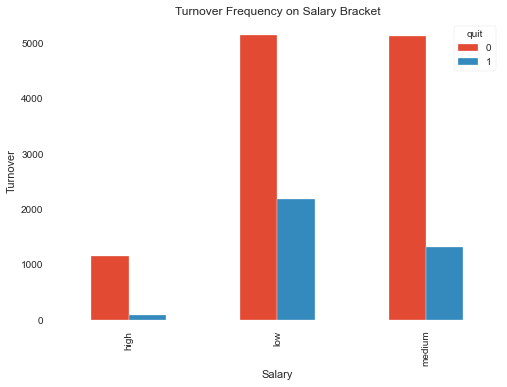

In [4]:
pd.crosstab(data.salary,data.quit).plot(kind='bar')
plt.title('Turnover Frequency on Salary Bracket')
plt.xlabel('Salary')
plt.ylabel('Turnover')

Text(0, 0.5, 'Turnover')

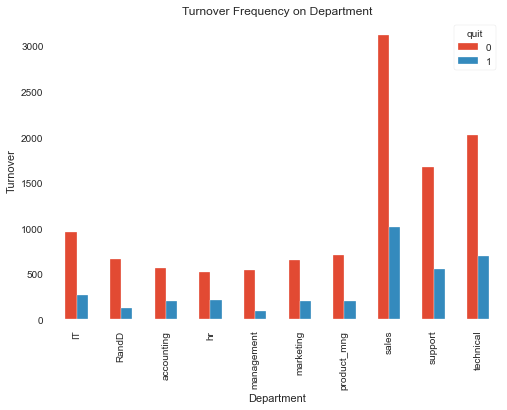

In [5]:
pd.crosstab(data.department,data.quit).plot(kind='bar')
plt.title('Turnover Frequency on Department')
plt.xlabel('Department')
plt.ylabel('Turnover')

# Encoding Cateogorical Variables

In [6]:
cat_var=['department', 'salary']
for var in cat_var:
    cat_list=pd.get_dummies(data[var],prefix=var)
    data=data.join(cat_list)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [7]:
data.drop(['department','salary'],axis=1,inplace=True)

In [8]:
data.shape

(14999, 21)

In [9]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [10]:
data.drop(['department_technical','salary_high'],axis=1,inplace=True)    

In [11]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [12]:
data.shape

(14999, 19)

# Class Imbalance

In [13]:
from yellowbrick.target import ClassBalance

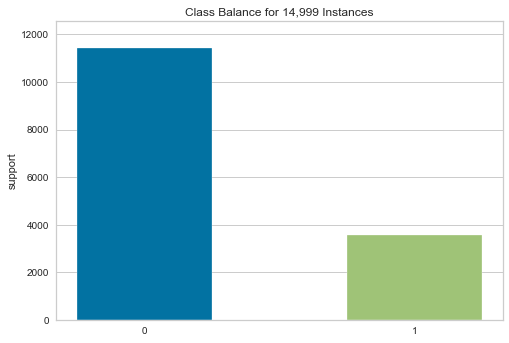

In [14]:
visualizer=ClassBalance().fit(data.quit)
visualizer.show()

# Test Train Split

In [15]:
y=data.quit
x=data.loc[:,data.columns != 'quit']

In [16]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,1,0


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: quit, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, stratify=y)

# Interactive Decision Tree Classfier

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import display, Image
from subprocess import call
import matplotlib.image as image

In [20]:
@interact
def plot_tree(crit=['gini','entropy'],
             split=['best','random'],
             depth = IntSlider(min = 1 ,max = 50 ,value = 2 ,continous_update = False ),
             min_split = IntSlider(min = 2 ,max = 5 ,value = 2 ,continous_update = False),
             min_leaf = IntSlider(min = 1 ,max = 5 ,value = 1 ,continous_update = False)):
    classifier=DecisionTreeClassifier(random_state=0,
                                     criterion=crit,
                                     splitter=split,
                                     max_depth=depth,
                                     min_samples_leaf=min_leaf,
                                     min_samples_split=min_split)
    classifier.fit(x_train,y_train)
    train_pred=classifier.predict(x_train)
    test_pred=classifier.predict(x_test)
    print("Decision Tree Training Accuracy : {:.2f}%".format(accuracy_score(y_train,train_pred)*100))
    print("Decision Tree Test Accuracy : {:.2f}%".format(accuracy_score(y_test,test_pred)*100))
    from sklearn.metrics import confusion_matrix
    print("\nConfusion Matrix for Test Data :")
    print(confusion_matrix(y_test,test_pred))
    print("\nConfusion Matrix for Training Data :")
    print(confusion_matrix(y_train,train_pred))
    
    #from graphviz import Source
    #from IPython.display import SVG
        
    #graph=Source(tree.export_graphviz(classifier,out_file=None,feature_names=x_train.columns,
    #                                  class_names=['Stayed','Quit'],
    #                                  filled=True))
    #display(Image(data=graph.pipe(format = 'svg')))

          

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# Random Forest Classifier

In [21]:
@interact
def random_forest(crit=['gini','entropy'],
                 bootstrap=['True','False'],
                 depth=IntSlider(min=1,max=30,value=5,continous_update=False),
                 forest=IntSlider(min=1,max=200,value=50,continous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2,continous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=2,continous_update=False),):
    forest_classifier= RandomForestClassifier(random_state=1,
                                             bootstrap=bootstrap,
                                             n_estimators=forest,
                                             max_depth=depth,
                                             min_samples_split=min_split,
                                             min_samples_leaf=min_leaf,
                                             n_jobs=-1)
    forest_classifier.fit(x_train,y_train)
    train_pred=forest_classifier.predict(x_train)
    test_pred=forest_classifier.predict(x_test)
    print("Random Forest Training Accuracy : {:.2f}%".format(accuracy_score(y_train,train_pred)*100))
    print("Random Forest Test Accuracy : {:.2f}%".format(accuracy_score(y_test,test_pred)*100))
    from sklearn.metrics import confusion_matrix
    print("\nConfusion Matrix for Test Data :")
    print(confusion_matrix(y_test,test_pred))
    print("\nConfusion Matrix for Training Data :")
    print(confusion_matrix(y_train,train_pred))
    
    #plotting a tree from the Forest
    
    #tree_n=forest_classifier.estimators_[0]    #visualizing First Tree
    
    #graph=Source(tree.export_graphviz(tree_n,out_file=None,
     #                                feature_names=x_train.columns,
      #                               class_names=['Stayed','Quit'],
       #                              filled=True))
    #display(Image(data=graph.pipe(format = 'svg')))
        

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…